## Concrete Formula Comparison
### Intro to Engineering, Fall 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
cols = ['Data Entry Time', 'Test Time', 'Ratio', 'UnReinforced', 'Reinforced']
data = pd.read_excel("Concrete-23-cleaned1.xlsx", usecols = cols)
data.head()

,Data Entry Time,Test Time,Ratio,UnReinforced,Reinforced
0,2023-09-26 09:34:30.232,2023-09-26 08:00:00,0.5,377.71000,2056.88000
1,2023-09-26 10:40:21.401,2023-09-26 09:13:00,0.5,606.23568,2363.41029
2,2023-09-26 10:46:46.138,2023-09-26 08:00:00,0.5,504.03346,1609.58000
3,2023-09-26 12:06:50.986,2023-09-26 09:00:00,0.5,540.33170,2189.93900
4,2023-09-26 12:39:58.335,2023-09-26 12:38:00,0.5,667.59353,2512.64258


In [3]:
## mean of unreinforced and reinforced based on ratio

data55 = data[data['Ratio']==0.55]
data50 = data[data['Ratio']==0.50]

In [4]:
mean55u = round(np.mean(data55['UnReinforced']), 2)
mean55r = round(np.mean(data55['Reinforced']), 2)
mean50u = round(np.mean(data50['UnReinforced']), 2)
mean50r = round(np.mean(data50['Reinforced']), 2)

ratio55 = mean55r/mean55u
ratio50 = mean50r/mean50u

print(f"Ratio: 55, Type: UnReinforced, Mean: {mean55u}")
print(f"Ratio: 55, Type: Reinforced  , Mean: {mean55r}")
print(f"Ratio: 50, Type: UnReinforced, Mean: {mean50u}")
print(f"Ratio: 50, Type: Reinforced  , Mean: {mean50r}")
print()
print(f"Ratio 55: {ratio55}")
print(f"Ratio 50: {ratio50}")

Ratio: 55, Type: UnReinforced, Mean: 478.0
Ratio: 55, Type: Reinforced  , Mean: 1839.11
Ratio: 50, Type: UnReinforced, Mean: 529.85
Ratio: 50, Type: Reinforced  , Mean: 1944.01

Ratio 55: 3.847510460251046
Ratio 50: 3.668981787298292


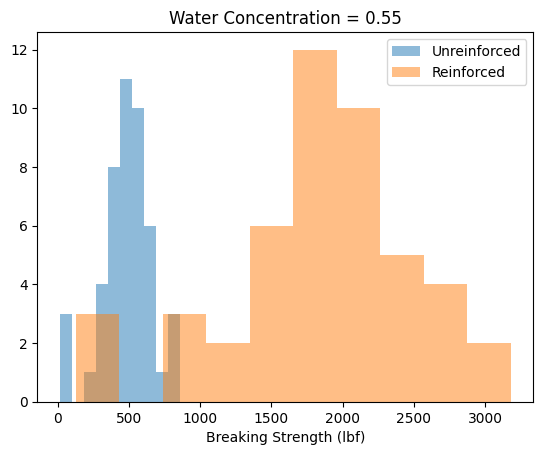

In [5]:
plt.hist(data55['UnReinforced'], alpha = 0.5, label = 'Unreinforced')
plt.hist(data55['Reinforced'], alpha = 0.5, label = 'Reinforced')
plt.title('Water Concentration = 0.55')
plt.xlabel('Breaking Strength (lbf)')
plt.legend()

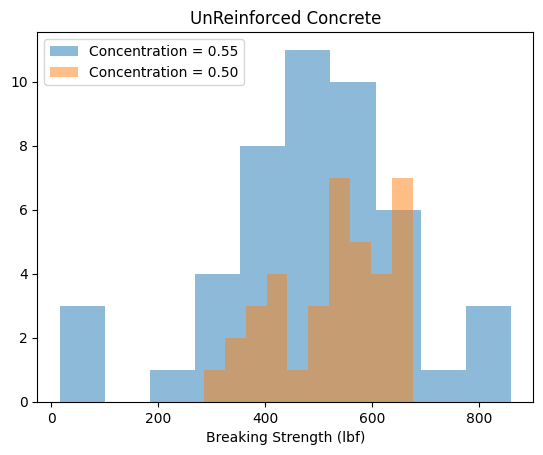

In [6]:
plt.hist(data55['UnReinforced'], alpha = 0.5, label = 'Concentration = 0.55')
plt.hist(data50['UnReinforced'], alpha = 0.5, label = 'Concentration = 0.50')
plt.title('UnReinforced Concrete')
plt.xlabel('Breaking Strength (lbf)')
plt.legend()

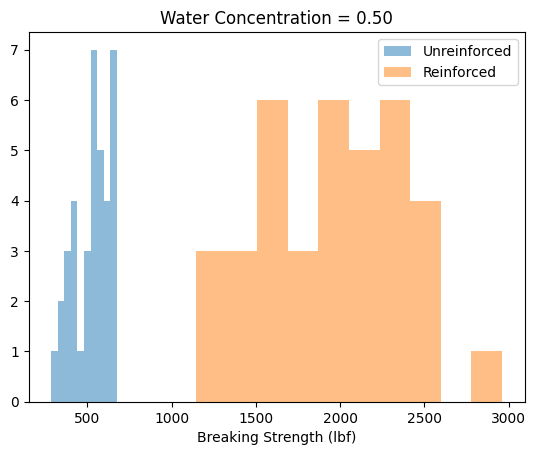

In [7]:
plt.hist(data50['UnReinforced'], alpha = 0.5, label = 'Unreinforced')
plt.hist(data50['Reinforced'], alpha = 0.5, label = 'Reinforced')
plt.title('Water Concentration = 0.50')
plt.xlabel('Breaking Strength (lbf)')
plt.legend()

In [8]:
data55.describe()

,Ratio,UnReinforced,Reinforced
count,4.700000e+01,47.000000,47.000000
mean,5.500000e-01,478.001642,1839.111122
std,1.122226e-16,175.210496,690.654026
min,5.500000e-01,16.438620,128.440920
25%,5.500000e-01,411.977050,1568.867000
50%,5.500000e-01,470.640500,1903.437000
75%,5.500000e-01,593.804435,2233.942850
max,5.500000e-01,858.628700,3179.486880


In [9]:
data50.describe()

,Ratio,UnReinforced,Reinforced
count,37.0,37.000000,37.000000
mean,0.5,529.849491,1944.013682
std,0.0,107.112171,428.842526
min,0.5,285.400000,1145.625290
25%,0.5,439.960000,1627.740000
50%,0.5,552.880000,1966.271050
75%,0.5,606.235680,2282.042000
max,0.5,675.325000,2960.894450


### Is the difference between the unreinforced means of the two concentrations statistically significant?

Null hypothesis: The difference between the means is not statistically significant.

Alternative hypothesis: The difference between the means is statistically significant.

In [10]:
stats.ttest_ind(data50['UnReinforced'], data55['UnReinforced'], axis=0)

Ttest_indResult(statistic=1.5812341974784863, pvalue=0.1176742720691522)

11.77% probability that the null hypothesis is true.

In [11]:
stats.ttest_ind(data50['Reinforced'], data55['Reinforced'], axis=0)

Ttest_indResult(statistic=0.8087292491208441, pvalue=0.4210111485943442)

Text(0.5, 0, 'Type')

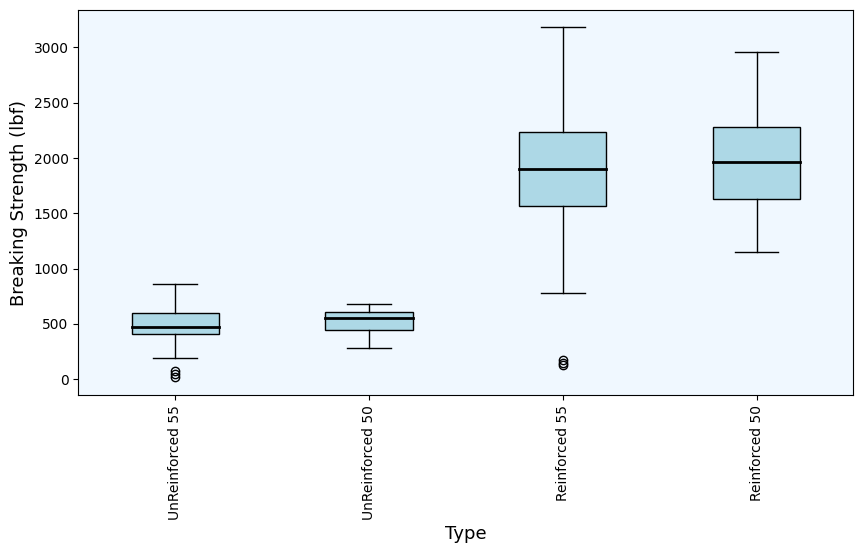

In [12]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'UnReinforced 55': data55['UnReinforced'], 'UnReinforced 50': data50['UnReinforced'], 'Reinforced 55': data55['Reinforced'], 'Reinforced 50': data50['Reinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys(), rotation = 90)
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Type', size = 13)

Next:

Cleaning original lab data